In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import SMOTE

df = pd.read_csv('creditcard.csv')


In [19]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)


In [22]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [23]:


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)


c:\Users\ASLAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:01:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [24]:
rf_preds = rf.predict(X_test)
xgb_preds = xgb.predict(X_test)

rf_acc = accuracy_score(y_test, rf_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
xgb_auc = roc_auc_score(y_test, xgb.predict_proba(X_test)[:, 1])

print(f"Random Forest -> Accuracy: {rf_acc:.4f}, ROC-AUC: {rf_auc:.4f}")
print(f"XGBoost       -> Accuracy: {xgb_acc:.4f}, ROC-AUC: {xgb_auc:.4f}")


Random Forest -> Accuracy: 0.9999, ROC-AUC: 1.0000
XGBoost       -> Accuracy: 0.9997, ROC-AUC: 1.0000


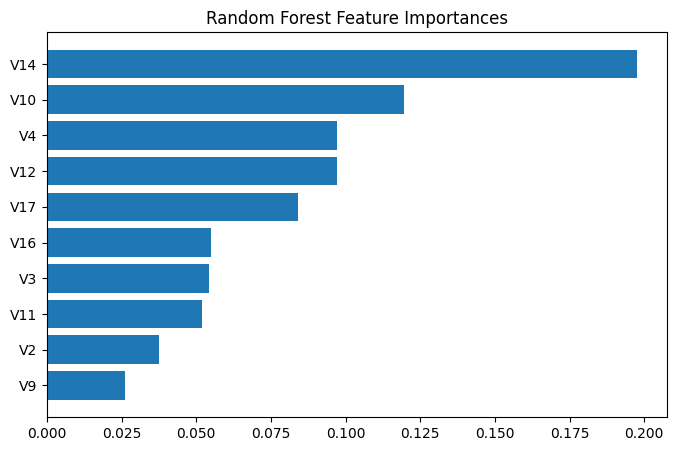

In [25]:
rf_importance = rf.feature_importances_
rf_indices = np.argsort(rf_importance)[-10:]

plt.figure(figsize=(8, 5))
plt.barh(range(len(rf_indices)), rf_importance[rf_indices], align='center')
plt.yticks(range(len(rf_indices)), [X.columns[i] for i in rf_indices])
plt.title("Random Forest Feature Importances")
plt.show()


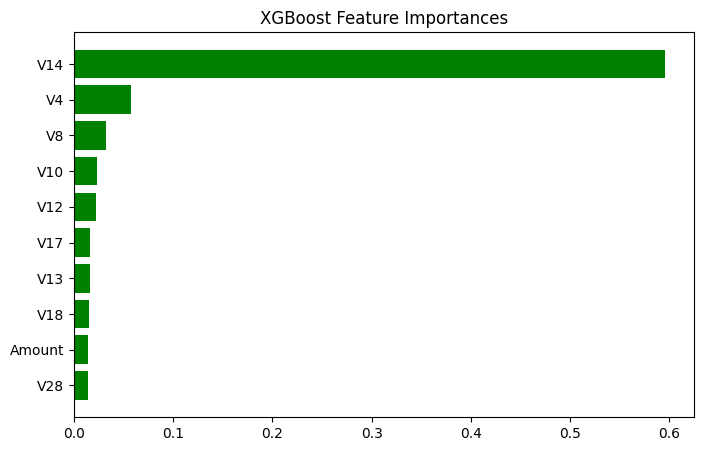

In [26]:
xgb_importance = xgb.feature_importances_
xgb_indices = np.argsort(xgb_importance)[-10:]

plt.figure(figsize=(8, 5))
plt.barh(range(len(xgb_indices)), xgb_importance[xgb_indices], align='center', color='green')
plt.yticks(range(len(xgb_indices)), [X.columns[i] for i in xgb_indices])
plt.title("XGBoost Feature Importances")
plt.show()
